In [39]:
# libraries
import numpy as np
import matplotlib.pyplot as plt

In [40]:
# constant parameters of the thruster positions
l = 30/100
w = 30/100

num_thrusters = 8
ndof = 6 

In [41]:
# functions
def thrust_mapper_matrix(alpha, a):
    TMM = np.array([[np.cos(alpha), np.cos(alpha), -np.cos(alpha), -np.cos(alpha), 0, 0, 0, 0],
                        [-np.sin(alpha), np.sin(alpha), -np.sin(alpha), np.sin(alpha), 0, 0, 0, 0],
                        [0, 0, 0, 0, 1, 1, 1, 1],
                        [0, 0, 0, 0, w/2, -w/2, w/2, -w/2],
                        [0, 0, 0, 0, -a, -a, a, a],
                        [-w/2*np.cos(alpha) - l/2*np.sin(alpha), w/2*np.cos(alpha) + l/2*np.sin(alpha), 
                         w/2*np.cos(alpha) + l/2*np.sin(alpha), -w/2*np.cos(alpha) - l/2*np.sin(alpha), 0, 0, 0, 0]])
    return TMM

def get_unit_thruster_forces(alpha, a):
    TMM = thrust_mapper_matrix(alpha, a)
    return np.linalg.pinv(TMM) @ np.eye(6)

In [42]:
# computation of thruster forces while varying alpha
alpha_initial = 0
alpha_final = 90

alpha = np.linspace(alpha_initial, alpha_final, 10)
alpha = np.deg2rad(alpha)

unit_thruster_forces = np.zeros((alpha.size ,num_thrusters, ndof))

for i in range(alpha.size):

    unit_thruster_forces[i,:,:] = get_unit_thruster_forces(alpha[i], a = 7.5)

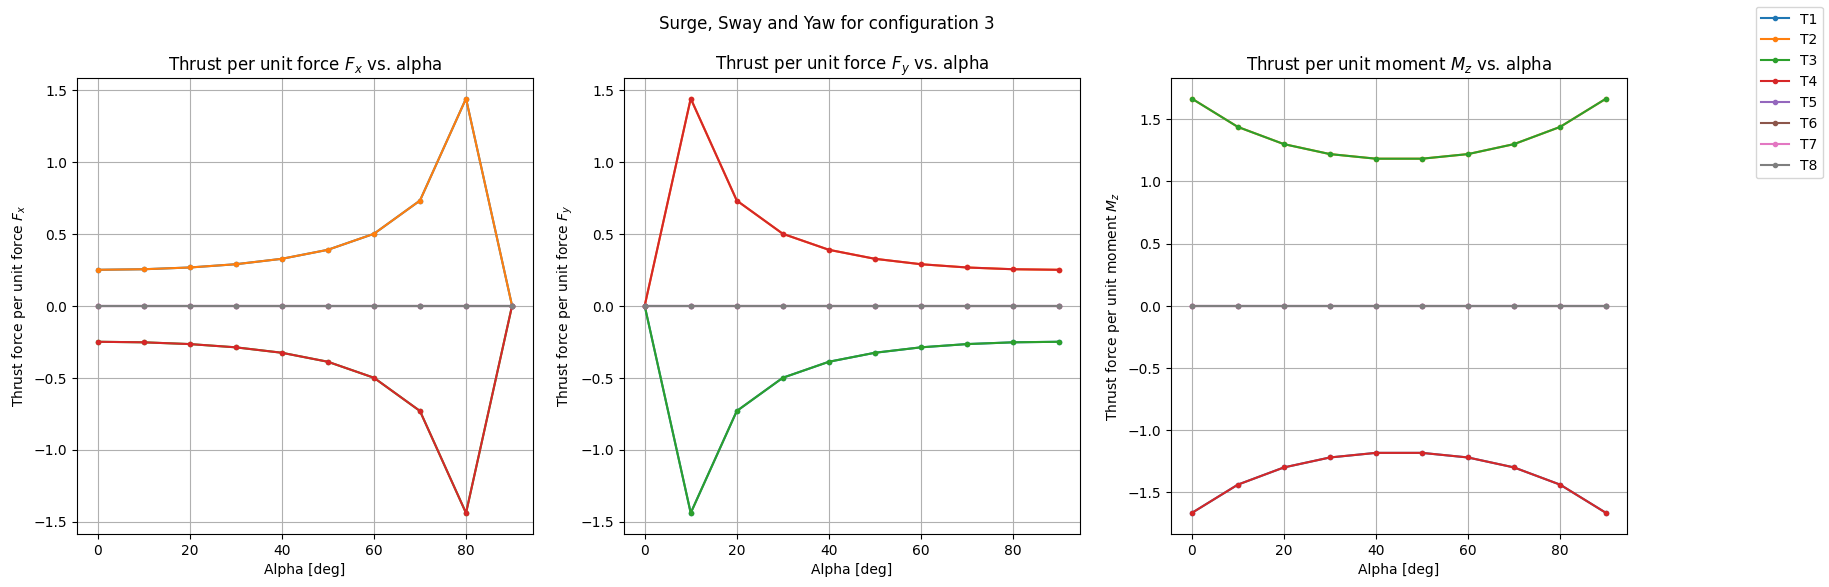

In [43]:
fig1, axs = plt.subplots(1,3)

dof = [0,1,5]
generalized_forces_txt = ['force $F_{x}$', 'force $F_{y}$', 'moment $M_{z}$']

for k, dof in enumerate(dof):
    for j in range(num_thrusters):
        axs[k].plot(np.rad2deg(alpha), unit_thruster_forces[:,j,dof], '.-', linewidth=1.5)
        axs[k].grid(open)
        axs[k].title.set_text("Thrust per unit " + generalized_forces_txt[k] + " vs. alpha")
        axs[k].set_xlabel("Alpha [deg]")
        axs[k].set_ylabel("Thrust force per unit " + generalized_forces_txt[k])
        axs[k].set_box_aspect(1)

fig1.legend(['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8'])
fig1.suptitle('Surge, Sway and Yaw for configuration 3')
fig1.set_size_inches(20,6)

In [44]:
# computation of thruster forces while varying alpha
alpha = np.deg2rad(45)
a_initial = 0
a_final = 15

a = np.linspace(a_initial, a_final, 10)/100

unit_thruster_forces = np.zeros((a.size, num_thrusters, ndof))

for i in range(a.size):

    unit_thruster_forces[i,:,:] = get_unit_thruster_forces(alpha, a[i])


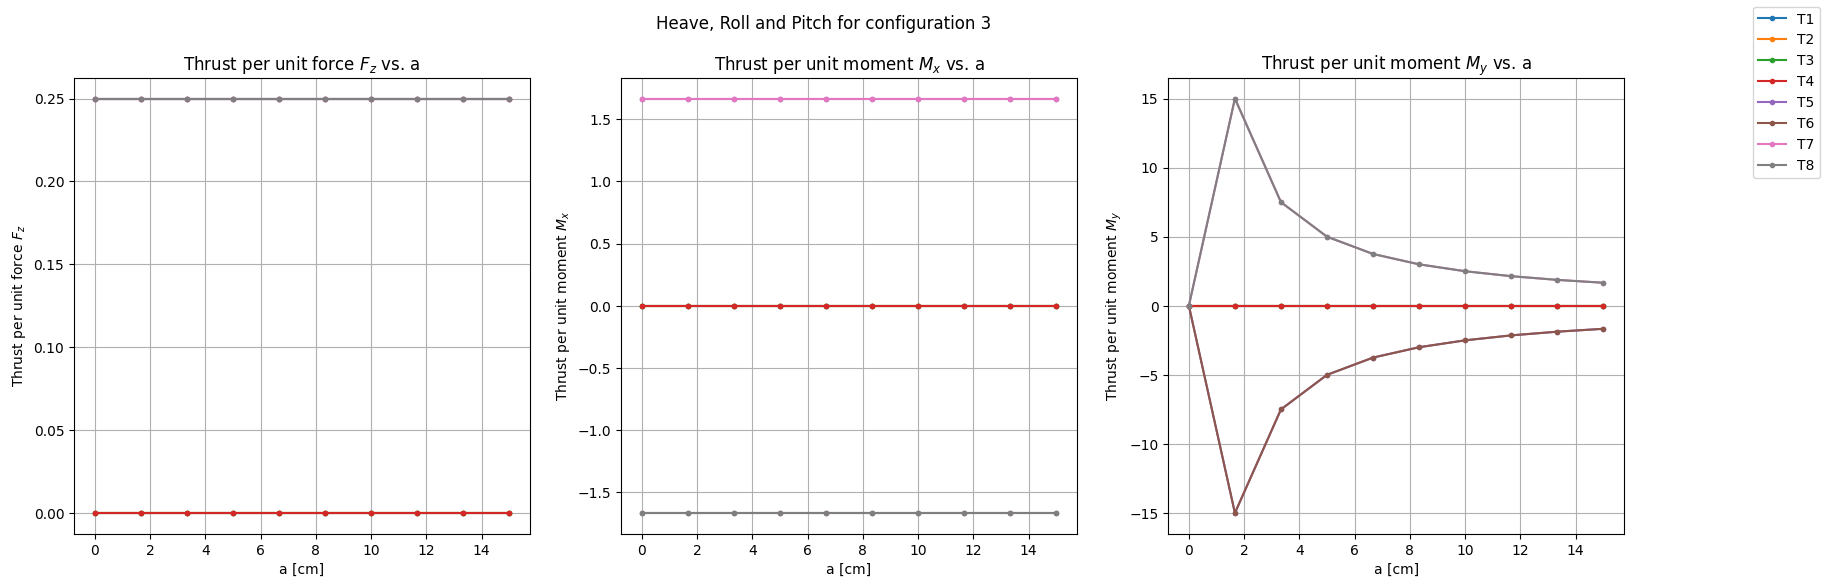

In [45]:
dof = [2,3,4]
generalized_forces_txt = ['force $F_{z}$', 'moment $M_{x}$', 'moment $M_{y}$']

fig2, axs = plt.subplots(1,3)

for k, dof in enumerate(dof):
    for j in range(num_thrusters):
        axs[k].plot(a * 100, unit_thruster_forces[:,j,dof], '.-', linewidth=1.5)
        axs[k].title.set_text("Thrust per unit " +  generalized_forces_txt[k] + " vs. a")
        axs[k].set_xlabel("a [cm]")
        axs[k].set_ylabel("Thrust per unit " + generalized_forces_txt[k])
        axs[k].set_box_aspect(1)
        axs[k].grid(open)

fig2.legend(['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8'])
fig2.suptitle('Heave, Roll and Pitch for configuration 3')
fig2.set_size_inches(20,6)

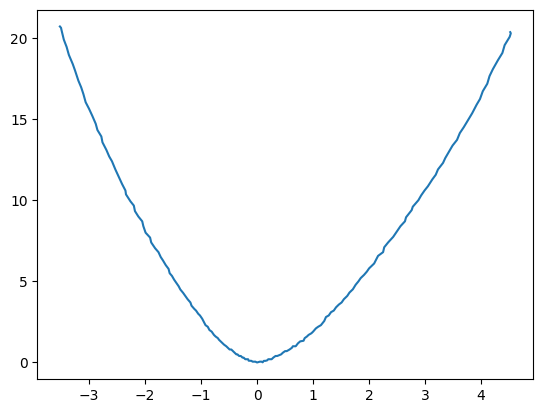

In [46]:
T200_data = np.loadtxt('T200-Data_14V.csv', delimiter = ',', skiprows = 1)
current_data = T200_data[:,[2]]
force_data = T200_data[:,[5]]

plt.plot(force_data, current_data)

In [47]:
unit_forces = get_unit_thruster_forces(alpha = np.deg2rad(45), a = 12/100)

max_thrust_force_neg = - 2.27*9.81  # kg.f
max_thrust_force_pos = 2.88*9.81  # kg.f

max_forces = np.zeros((6,1))

for i in range(ndof):
    if np.isclose(np.min(unit_forces[:,[i]]) + np.max(unit_forces[:,[i]]),0):
        max_forces[i] = max_thrust_force_neg / np.min(unit_forces[:,[i]])
    else:
        max_forces[i] = max_thrust_force_pos / np.max(unit_forces[:,[i]])


print(max_forces, "\n")

print(1.9261*unit_forces[:,[5]])


[[ 62.98539511]
 [ 62.98539511]
 [113.0112    ]
 [ 13.36122   ]
 [ 10.688976  ]
 [ 18.89561853]] 

[[-2.26993062]
 [ 2.26993062]
 [ 2.26993062]
 [-2.26993062]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]]
